In [5]:
import pandas as pd
file_path = r"D:\Projects\IBM HR Analytics Employee Attrition and Performance\data\working_hr.csv"
df = pd.read_csv(file_path)

In [6]:
print("Dataset Shape:", df.shape)
print("Column Names:", df.columns)
print("\nMissing Values:\n", df.isnull().sum())

Dataset Shape: (1470, 35)
Column Names: Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Missing Values:
 Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField       

In [7]:
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
                Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        

In [8]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

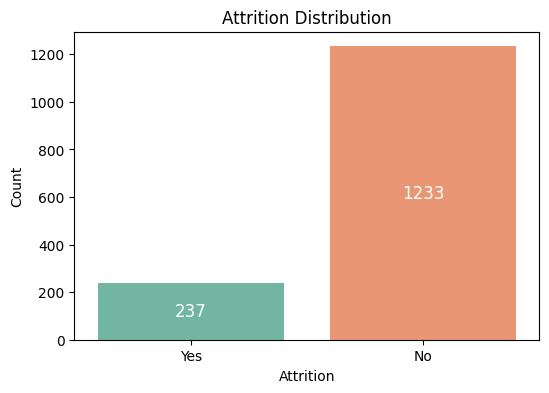

In [15]:
# Create the countplot
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df, x='Attrition', hue='Attrition', palette='Set2', legend=False)

# Annotate the bars with count labels inside
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='center', fontsize=12, color='white')

# Add title and labels
plt.title('Attrition Distribution')
plt.xlabel('Attrition')
plt.ylabel('Count')

plt.savefig(r"D:\Projects\IBM HR Analytics Employee Attrition and Performance\reports\attrition_distribution.png", bbox_inches='tight')
# Show the plot
plt.show()


### Attrition Distribution Analysis 
- The dataset consists of **1,470 employees**.
- **237 employees (16.1%)** have left the company (**Attrition = Yes**).
- **1,233 employees (83.9%)** have stayed (**Attrition = No**).
- The company has a relatively low attrition rate, but further analysis is needed to identify key factors influencing employee turnover.


In [17]:
df_numeric = df.copy()

In [19]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()
for col in df_numeric.select_dtypes(include=['object']).columns:  # Only categorical columns
    df_numeric[col] = label_encoder.fit_transform(df_numeric[col])

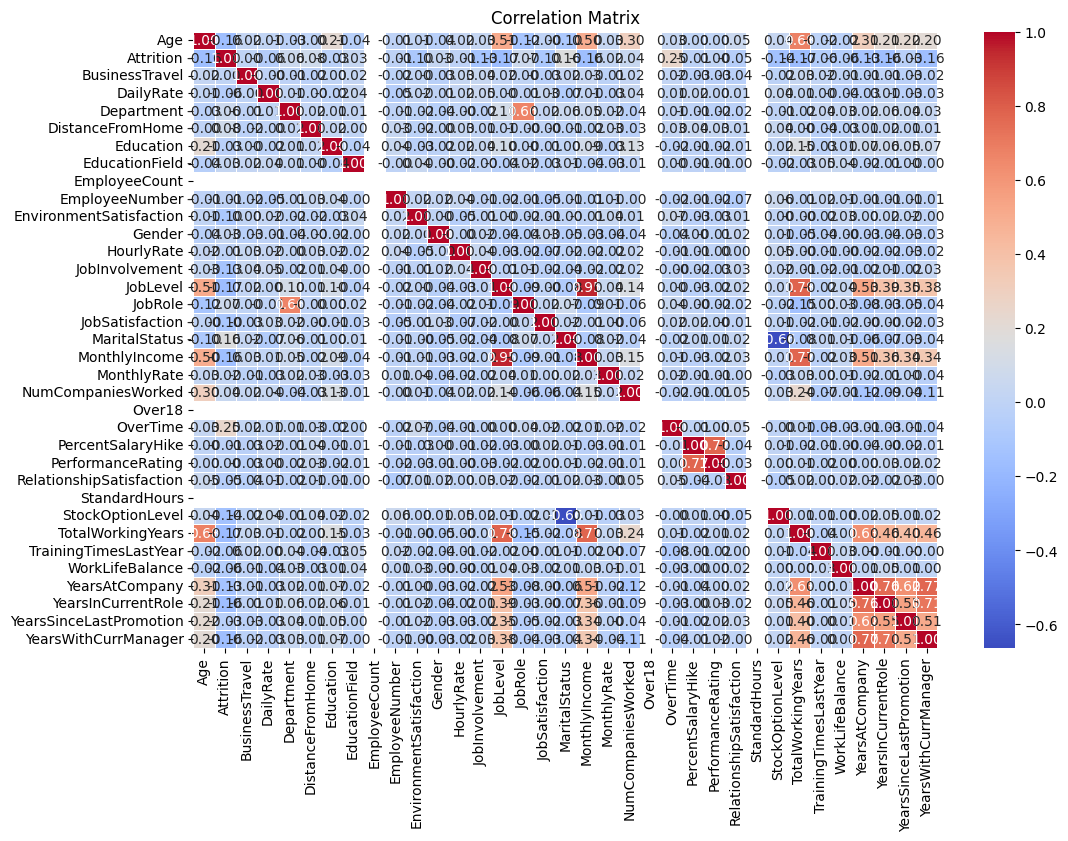

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()